            State  Year  Two Wheelers  Three Wheelers    Cars  Buses  Trucks
0  Andhra Pradesh  2010        171958           20795  151932   4272    6734
1  Andhra Pradesh  2011        187337           21850  107498   3944    9322
2  Andhra Pradesh  2012        379365            5769  214027   2933    6311
3  Andhra Pradesh  2013        153355           44188  234176   3885    7396
4  Andhra Pradesh  2014        308795           32480  176730   3058    8849


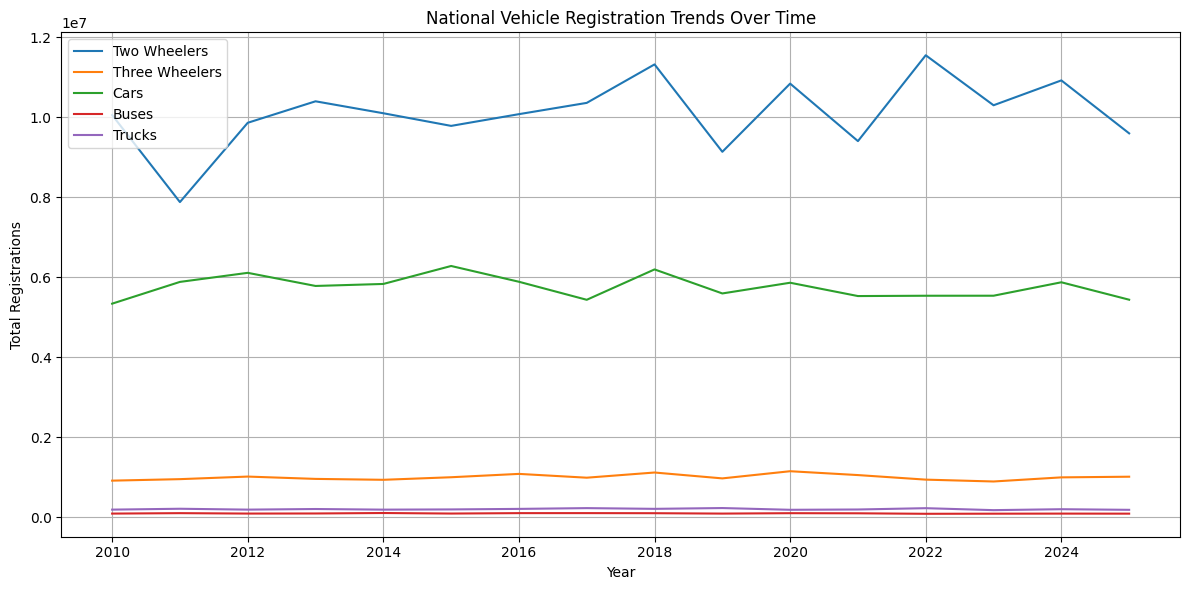

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("india_vehicle_sales_yearly.csv")

# Convert year to datetime if needed
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# View sample
print(df.head())

# Group by year to see national level trends
yearly_trends = df.groupby('Year')[['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']].sum().reset_index()

# Plot trends
plt.figure(figsize=(12, 6))
for col in ['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']:
    plt.plot(yearly_trends['Year'], yearly_trends[col], label=col)

plt.title("National Vehicle Registration Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


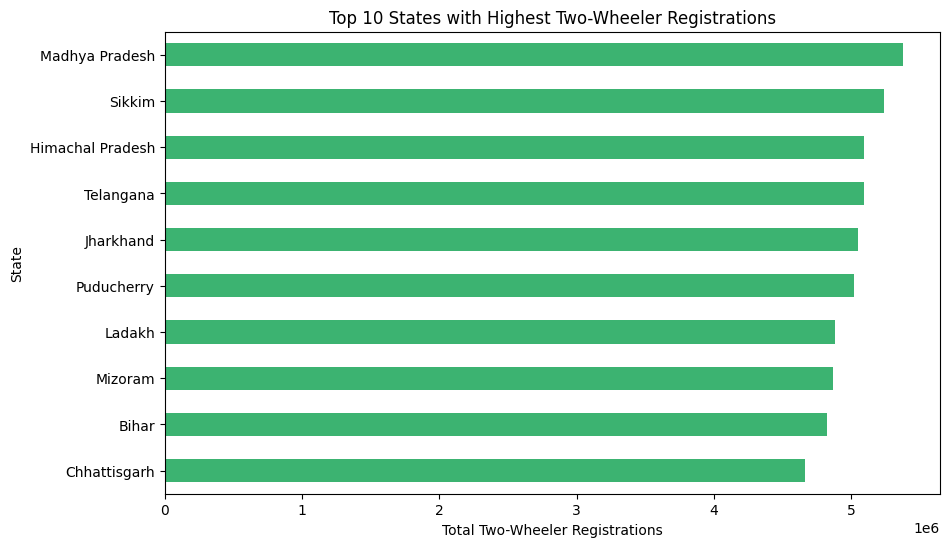

In [2]:
# Total registrations per state for Two Wheelers
top_states_2w = df.groupby('State')['Two Wheelers'].sum().sort_values(ascending=False).head(10)

# Bar plot
top_states_2w.plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.title("Top 10 States with Highest Two-Wheeler Registrations")
plt.xlabel("Total Two-Wheeler Registrations")
plt.gca().invert_yaxis()
plt.show()


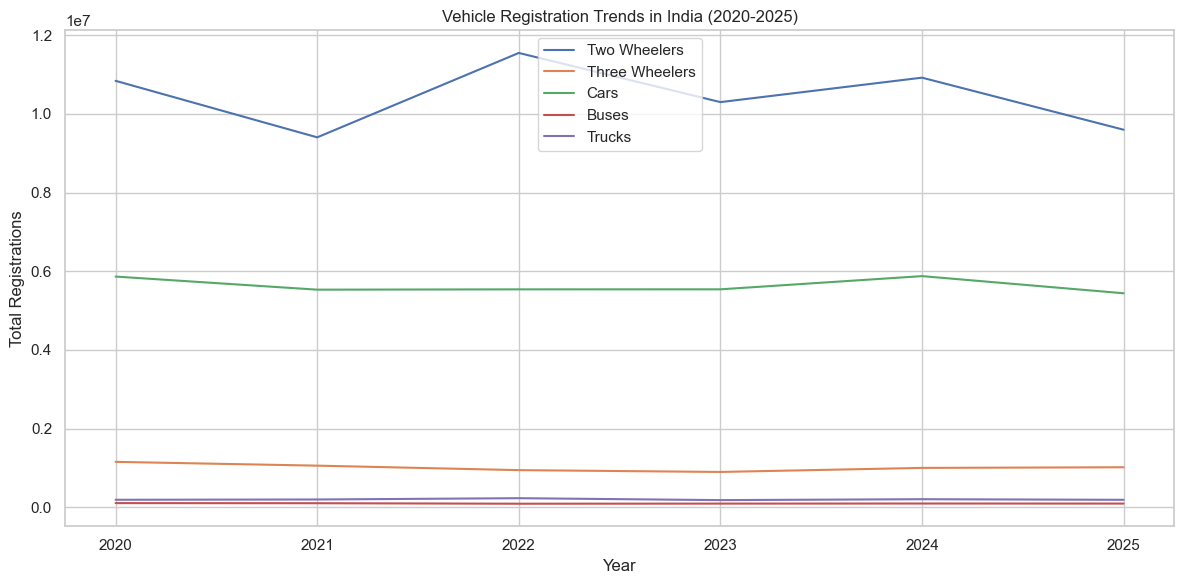


CAGR (Compound Annual Growth Rate) by Vehicle Type:
                    CAGR
Trucks         -0.000884
Cars           -0.014902
Buses          -0.022707
Two Wheelers   -0.024062
Three Wheelers -0.024957


C:\Users\sujal\AppData\Local\Temp\ipykernel_20412\4205276047.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CAGR', y=cagr_df.index, data=cagr_df, palette='viridis')


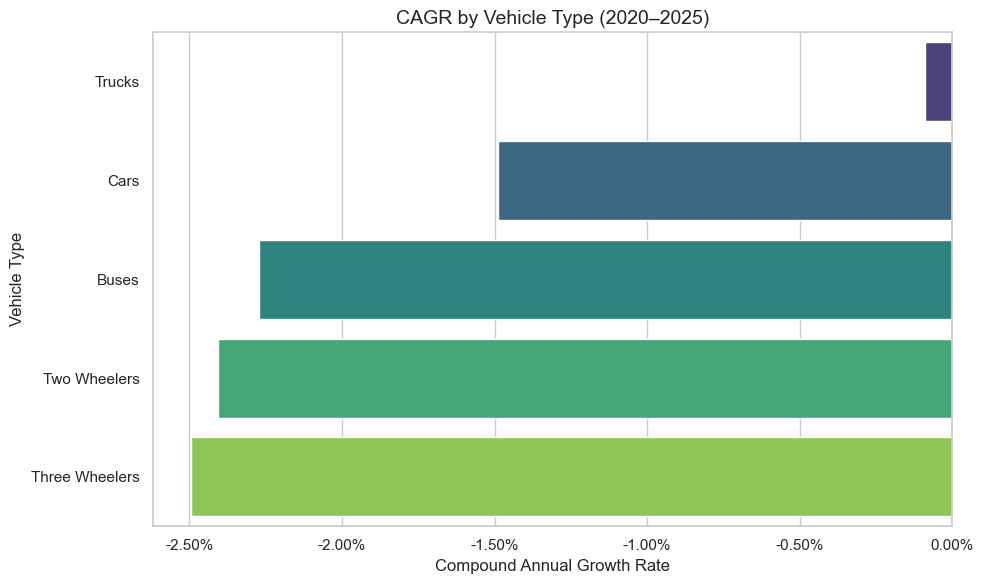

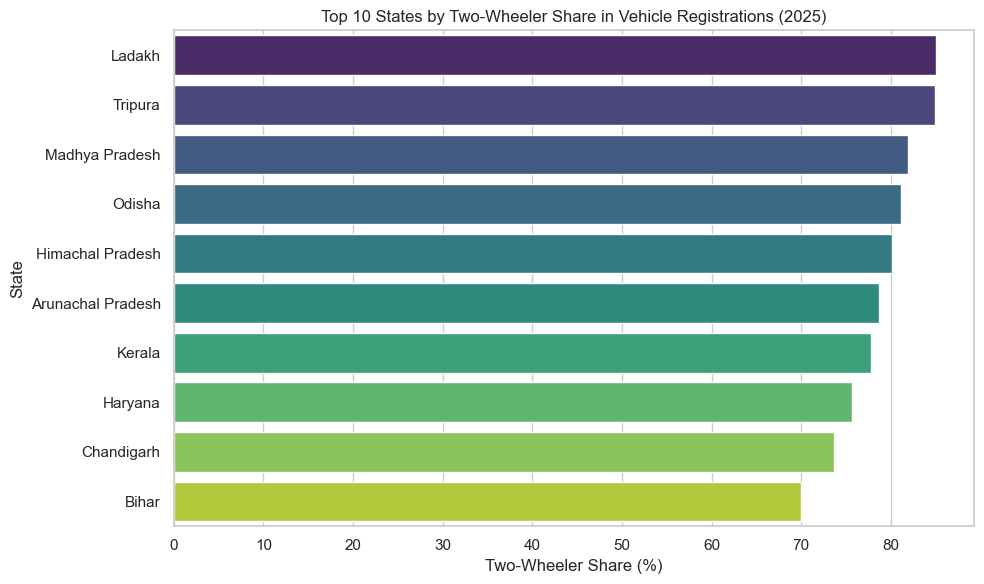

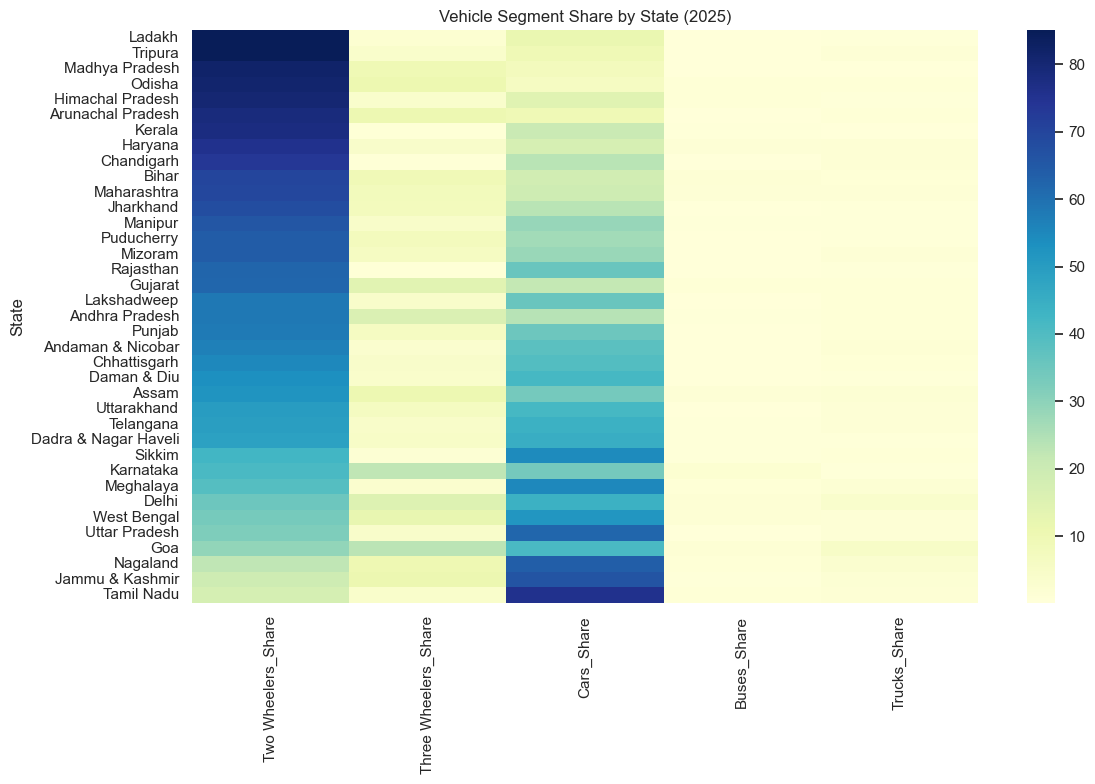

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('india_vehicle_sales_yearly.csv')  # Replace with your file name

# Clean column names
df.columns = df.columns.str.strip()

# Ensure 'Year' is integer
df['Year'] = df['Year'].astype(int)

# Filter data for years 2020 to 2025
df = df[(df['Year'] >= 2020) & (df['Year'] <= 2025)]

# Group by Year for national trends
yearly_total = df.groupby('Year')[['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']].sum().reset_index()

# Plot national trend
plt.figure(figsize=(12,6))
for col in yearly_total.columns[1:]:
    plt.plot(yearly_total['Year'], yearly_total[col], label=col)
plt.title('Vehicle Registration Trends in India (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Total Registrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CAGR Calculation per Segment
def calculate_cagr(start, end, periods):
    return ((end / start) ** (1 / periods)) - 1

growth_data = {}
start_year = df['Year'].min()
end_year = df['Year'].max()
periods = end_year - start_year

for col in ['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']:
    start_val = yearly_total[yearly_total['Year'] == start_year][col].values[0]
    end_val = yearly_total[yearly_total['Year'] == end_year][col].values[0]
    growth_data[col] = calculate_cagr(start_val, end_val, periods)

# Display CAGR
cagr_df = pd.DataFrame.from_dict(growth_data, orient='index', columns=['CAGR']).sort_values(by='CAGR', ascending=False)
print("\nCAGR (Compound Annual Growth Rate) by Vehicle Type:")
print(cagr_df)
# Set a style for better visuals
sns.set(style="whitegrid")

# Plot the CAGR values
plt.figure(figsize=(10, 6))
sns.barplot(x='CAGR', y=cagr_df.index, data=cagr_df, palette='viridis')

# Add title and labels
plt.title('CAGR by Vehicle Type (2020–2025)', fontsize=14)
plt.xlabel('Compound Annual Growth Rate')
plt.ylabel('Vehicle Type')

# Format CAGR values as percentage on the x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}'))

# Show the plot
plt.tight_layout()
plt.show()


# Market Share in Latest Year
latest_year_data = df[df['Year'] == end_year].groupby('State')[['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']].sum()

# Add Total registrations per state
latest_year_data['Total'] = latest_year_data.sum(axis=1)

# Filter out states with very low total vehicle registration (e.g., < 10000)
latest_year_data = latest_year_data[latest_year_data['Total'] > 10000]

# Calculate segment-wise share
for col in ['Two Wheelers', 'Three Wheelers', 'Cars', 'Buses', 'Trucks']:
    latest_year_data[col + '_Share'] = latest_year_data[col] / latest_year_data['Total'] * 100


# Top 10 states by Two-Wheeler share
top_2w_states = latest_year_data.sort_values(by='Two Wheelers_Share', ascending=False).head(10)

# Add a dummy column to use as hue (to safely pass palette)
top_2w_states['State'] = top_2w_states.index

# Plot updated chart with `hue` specified
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_2w_states,
    x='Two Wheelers_Share',
    y='State',
    hue='State',         # use state as hue
    palette='viridis',
    legend=False         # hide the legend since it's redundant
)

plt.title('Top 10 States by Two-Wheeler Share in Vehicle Registrations (' + str(end_year) + ')')
plt.xlabel('Two-Wheeler Share (%)')
plt.tight_layout()
plt.show()


# Heatmap of shares
share_cols = [col for col in latest_year_data.columns if 'Share' in col]
plt.figure(figsize=(12,8))
sns.heatmap(latest_year_data[share_cols].sort_values(by='Two Wheelers_Share', ascending=False), cmap='YlGnBu', annot=False)
plt.title('Vehicle Segment Share by State (' + str(end_year) + ')')
plt.tight_layout()
plt.show()
